In [2]:
%matplotlib inline

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
import networkx as nx

# Working with Spatial Data and Networks

In [3]:
earthquakes = pd.read_csv("earthquakes.csv")

In [4]:
earthquakes.shape

(23412, 21)

In [5]:
earthquakes.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [6]:
earthquakes.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,23412.0,1.679033,30.113183,-77.080000,-18.65300,-3.5685,26.19075,86.005
Longitude,23412.0,39.639961,125.511959,-179.997000,-76.34975,103.9820,145.02625,179.998
Depth,23412.0,70.767911,122.651898,-1.100000,14.52250,33.0000,54.00000,700.000
Depth Error,4461.0,4.993115,4.875184,0.000000,1.80000,3.5000,6.30000,91.295
Depth Seismic Stations,7097.0,275.364098,162.141631,0.000000,146.00000,255.0000,384.00000,934.000
Magnitude,23412.0,5.882531,0.423066,5.500000,5.60000,5.7000,6.00000,9.100
Magnitude Error,327.0,0.071820,0.051466,0.000000,0.04600,0.0590,0.07550,0.410
Magnitude Seismic Stations,2564.0,48.944618,62.943106,0.000000,10.00000,28.0000,66.00000,821.000
Azimuthal Gap,7299.0,44.163532,32.141486,0.000000,24.10000,36.0000,54.00000,360.000
Horizontal Distance,1604.0,3.992660,5.377262,0.004505,0.96875,2.3195,4.72450,37.874


In [7]:
earthquakes.columns = earthquakes.columns.str.lower().str.replace(" ", "-")

In [8]:
list(earthquakes.columns)

['date',
 'time',
 'latitude',
 'longitude',
 'type',
 'depth',
 'depth-error',
 'depth-seismic-stations',
 'magnitude',
 'magnitude-type',
 'magnitude-error',
 'magnitude-seismic-stations',
 'azimuthal-gap',
 'horizontal-distance',
 'horizontal-error',
 'root-mean-square',
 'id',
 'source',
 'location-source',
 'magnitude-source',
 'status']

In [9]:
earthquakes.date.str.len().value_counts()

10    23409
24        3
Name: date, dtype: int64

In [10]:
normal_dates = earthquakes.date.str.len() != 24

In [11]:
normal_datetime = pd.to_datetime(
    earthquakes[normal_dates].date + " " + earthquakes[normal_dates].time
)

In [12]:
earthquakes["datetime"] = normal_datetime

In [13]:
missing_datetime_indecies = earthquakes[earthquakes.datetime.isna()].index
missing_datetime_indecies

Int64Index([3378, 7512, 20650], dtype='int64')

In [14]:
converted_abnormal_datetimes = pd.to_datetime(
    earthquakes.loc[missing_datetime_indecies, "date"]
)
converted_abnormal_datetimes

3378           1975-02-23 02:58:41+00:00
7512    1985-04-28 02:53:41.530000+00:00
20650   2011-03-13 02:23:34.520000+00:00
Name: date, dtype: datetime64[ns, UTC]

In [15]:
earthquakes.loc[missing_datetime_indecies, "datetime"] = converted_abnormal_datetimes

In [16]:
earthquakes.datetime = pd.to_datetime(earthquakes.datetime, utc=True)

In [17]:
earthquakes = earthquakes.drop(columns=["date", "time"])

In [18]:
earthquakes.dtypes

latitude                                  float64
longitude                                 float64
type                                       object
depth                                     float64
depth-error                               float64
depth-seismic-stations                    float64
magnitude                                 float64
magnitude-type                             object
magnitude-error                           float64
magnitude-seismic-stations                float64
azimuthal-gap                             float64
horizontal-distance                       float64
horizontal-error                          float64
root-mean-square                          float64
id                                         object
source                                     object
location-source                            object
magnitude-source                           object
status                                     object
datetime                      datetime64[ns, UTC]


In [19]:
earthquakes.type.value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: type, dtype: int64

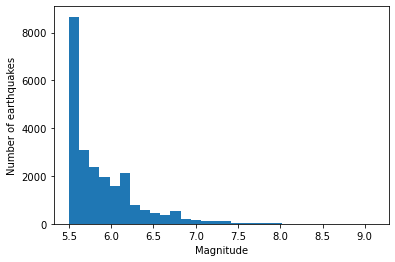

In [20]:
plt.hist(earthquakes.magnitude, bins=30)
plt.xlabel("Magnitude")
plt.ylabel("Number of earthquakes")
plt.show()

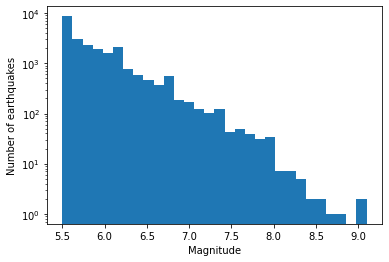

In [21]:
plt.hist(earthquakes.magnitude, bins=30, log=True)
plt.xlabel("Magnitude")
plt.ylabel("Number of earthquakes")
plt.show()

In [22]:
earthquakes.nlargest(5, "magnitude")

,latitude,longitude,type,depth,depth-error,depth-seismic-stations,magnitude,magnitude-type,magnitude-error,magnitude-seismic-stations,azimuthal-gap,horizontal-distance,horizontal-error,root-mean-square,id,source,location-source,magnitude-source,status,datetime
17083,3.295,95.982,Earthquake,30.0,NaN,601.0,9.1,MW,NaN,NaN,22.0,NaN,NaN,1.17,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed,2004-12-26 00:58:53+00:00
20501,38.297,142.373,Earthquake,29.0,NaN,541.0,9.1,MWW,NaN,NaN,9.5,NaN,NaN,1.16,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed,2011-03-11 05:46:24+00:00
19928,-36.122,-72.898,Earthquake,22.9,9.2,454.0,8.8,MWW,NaN,NaN,17.8,NaN,NaN,1.09,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed,2010-02-27 06:34:12+00:00
16,51.251,178.715,Earthquake,30.3,NaN,NaN,8.7,MW,NaN,NaN,NaN,NaN,NaN,NaN,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic,1965-02-04 05:01:22+00:00
17329,2.085,97.108,Earthquake,30.0,NaN,510.0,8.6,MWW,NaN,NaN,22.1,NaN,NaN,0.91,OFFICIAL20050328160936530_30,OFFICIAL,US,OFFICIAL,Reviewed,2005-03-28 16:09:37+00:00


In [23]:
Basemap()

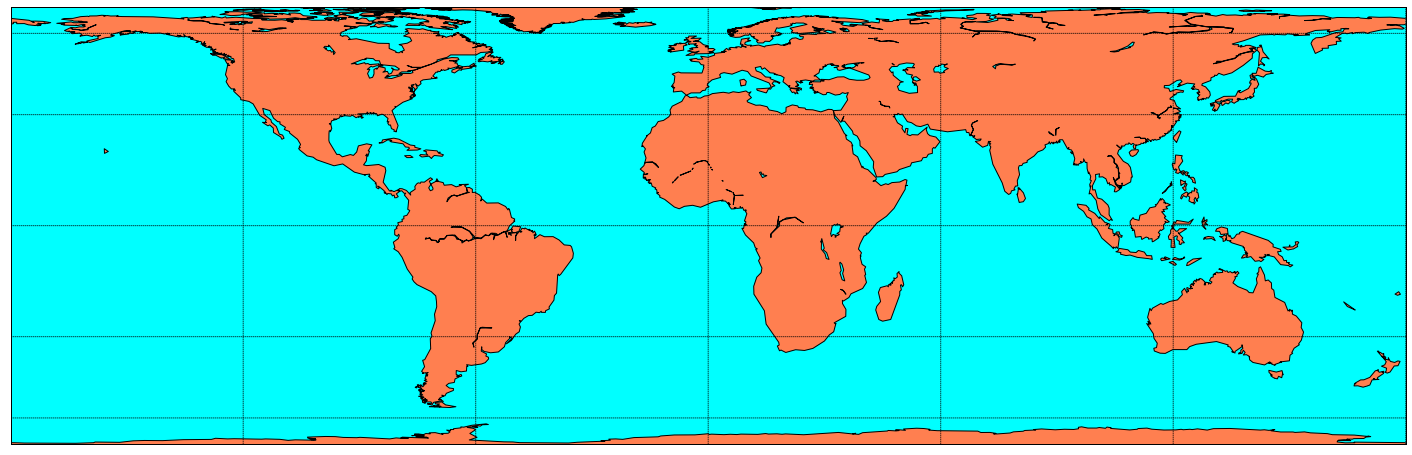

In [24]:
plt.figure(figsize=(25, 12))
m = Basemap(
    projection="cea", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180
)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color="aqua")
plt.show()

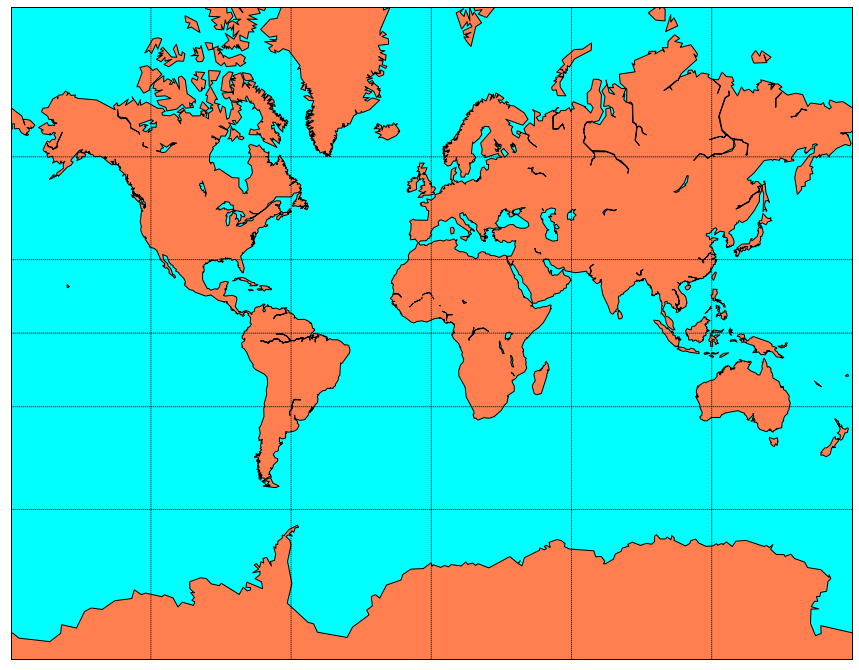

In [25]:
plt.figure(figsize=(25, 12))
m = Basemap(
    projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180
)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color="aqua")
plt.show()

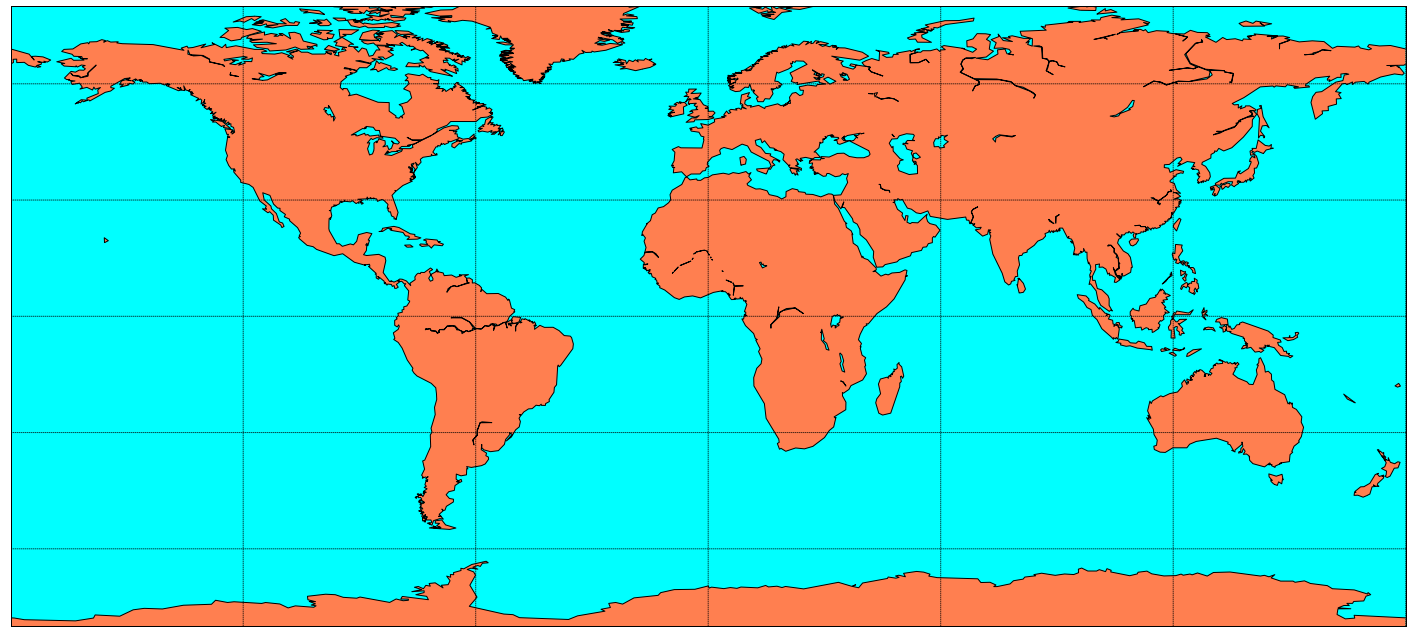

In [26]:
plt.figure(figsize=(25, 12))
m = Basemap(
    projection="cyl", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180
)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color="aqua")
plt.show()

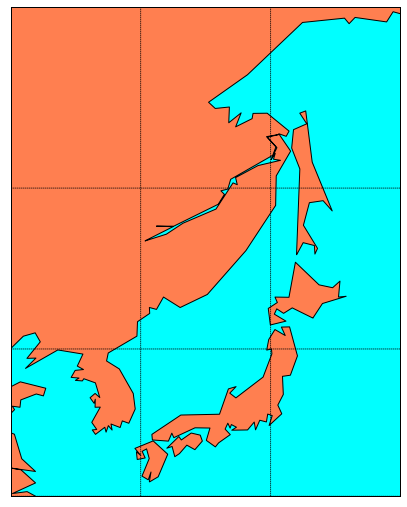

In [27]:
plt.figure(figsize=(18, 9))
m = Basemap(projection="mill", llcrnrlat=30, urcrnrlat=60, llcrnrlon=120, urcrnrlon=150)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 10))
m.drawmeridians(np.arange(-180, 181, 10))
m.drawmapboundary(fill_color="aqua")
plt.show()

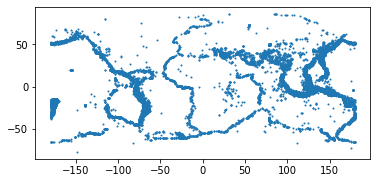

In [28]:
plt.scatter(earthquakes.longitude, earthquakes.latitude, s=1)
plt.gca().set_aspect("equal")
plt.show()

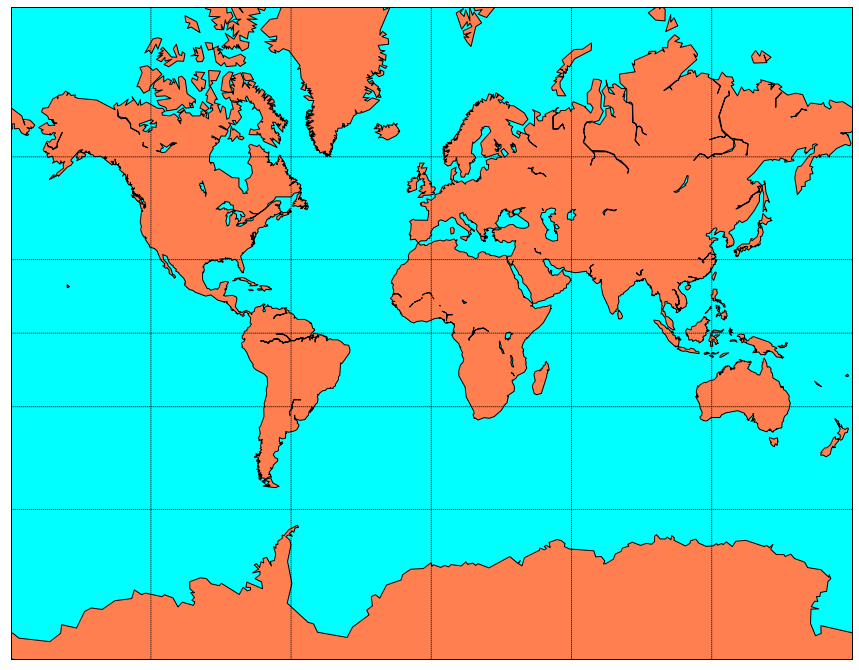

In [29]:
plt.figure(figsize=(25, 12))

m = Basemap(
    projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180
)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color="aqua")

plt.scatter(earthquakes.longitude, earthquakes.latitude, s=1)

plt.show()

In [30]:
m

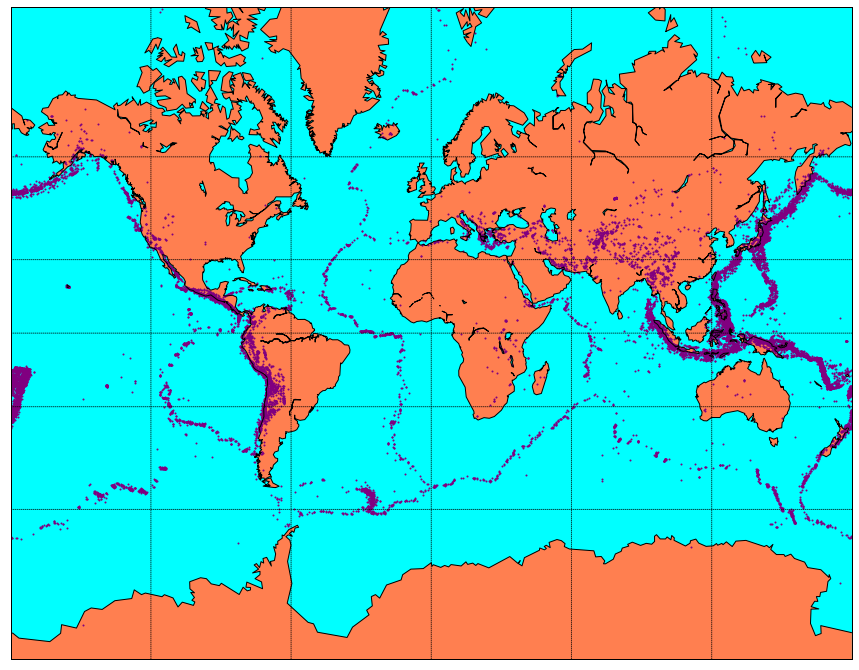

In [31]:
plt.figure(figsize=(25, 12))

m = Basemap(
    projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180
)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color="aqua")

earthquakes_x, earthquakes_y = m(
    earthquakes.longitude.to_list(), earthquakes.latitude.to_list()
)
plt.scatter(earthquakes_x, earthquakes_y, s=1, c="purple")

plt.show()

In [32]:
earthquakes_x, earthquakes_y = m(
    earthquakes.longitude.to_list(), earthquakes.latitude.to_list()
)

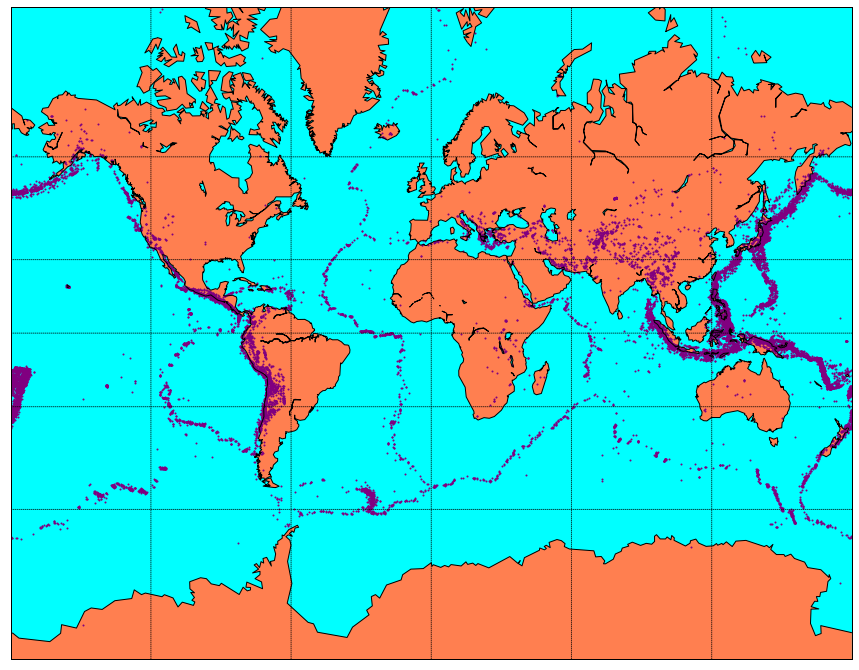

In [33]:
plt.figure(figsize=(25, 12))

m = Basemap(
    projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180
)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color="aqua")

plt.scatter(earthquakes_x, earthquakes_y, s=1, c="purple")

plt.show()

In [34]:
strongest_earthquakes_x, strongest_earthquakes_y = m(
    earthquakes[earthquakes.magnitude >= 8].longitude.to_list(),
    earthquakes[earthquakes.magnitude >= 8].latitude.to_list(),
)
strongest_magnitudes = earthquakes[earthquakes.magnitude >= 8].magnitude
size = 50 * (strongest_magnitudes - 7) ** 3

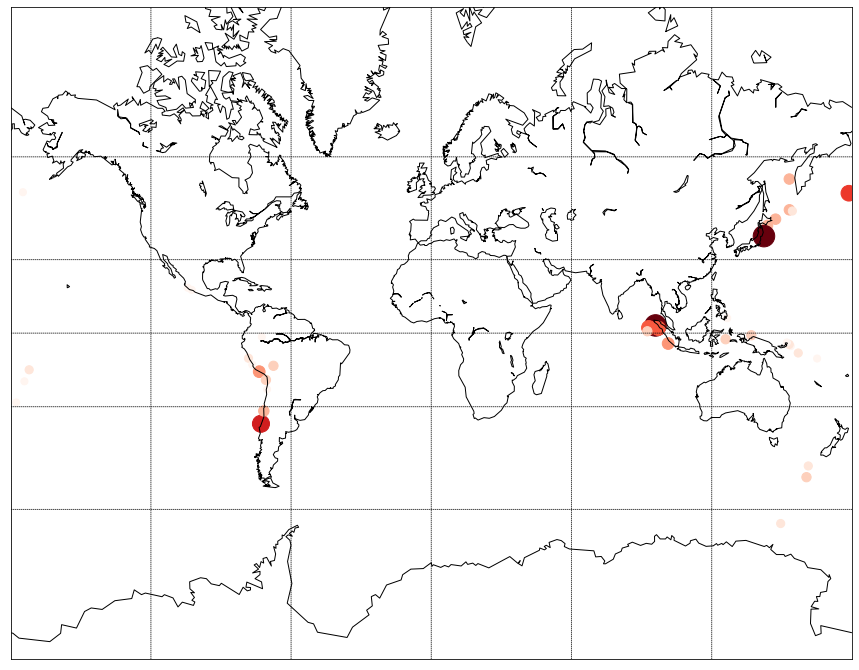

In [35]:
plt.figure(figsize=(25, 12))

m = Basemap(
    projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180
)
m.drawcoastlines()
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))

plt.scatter(
    strongest_earthquakes_x,
    strongest_earthquakes_y,
    s=size,
    c=strongest_magnitudes,
    cmap="Reds",
)

plt.show()

In [36]:
volcanos = pd.read_csv("volcanos.csv")

In [37]:
volcanos_x, volcanos_y = m(volcanos.Longitude.to_list(), volcanos.Latitude.to_list())

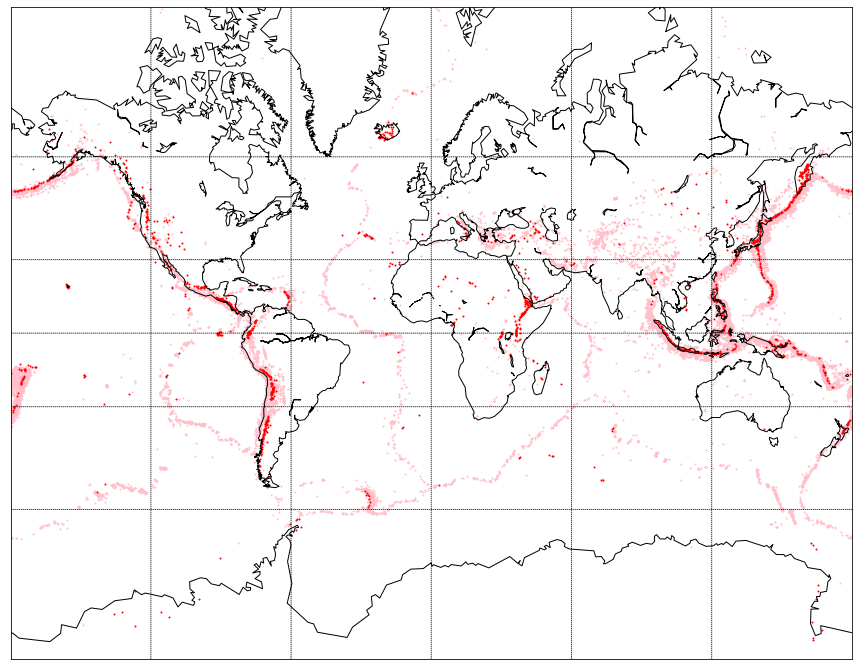

In [38]:
plt.figure(figsize=(25, 12))

m = Basemap(
    projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180
)
m.drawcoastlines()
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))

plt.scatter(earthquakes_x, earthquakes_y, s=1, c="pink")
plt.scatter(volcanos_x, volcanos_y, s=1, c="red")

plt.show()

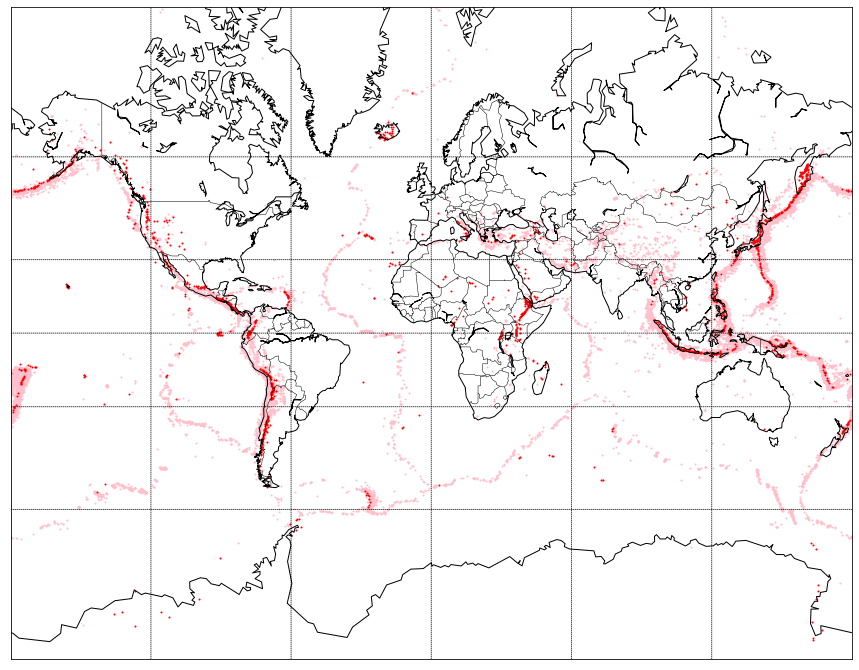

In [39]:
plt.figure(figsize=(25, 12))

m = Basemap(
    projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180
)
m.drawcoastlines()
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawcountries()


plt.scatter(earthquakes_x, earthquakes_y, s=1, c="pink")
plt.scatter(volcanos_x, volcanos_y, s=1, c="red")

plt.show()

## Choropleth Map (Картограма)

In [40]:
ufos = pd.read_csv("ufo_sightings_scrubbed.csv", low_memory=False)
ufos = ufos[["datetime", "country", "state", "latitude", "longitude "]]
ufos.columns = ["datetime", "country", "state", "latitude", "longitude"]
ufos = ufos[ufos.country == "us"]
ufos.head()

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,tx,29.8830556,-97.941111
3,10/10/1956 21:00,us,tx,28.9783333,-96.645833
4,10/10/1960 20:00,us,hi,21.4180556,-157.803611
5,10/10/1961 19:00,us,tn,36.5950000,-82.188889
7,10/10/1965 23:45,us,ct,41.1175000,-73.408333


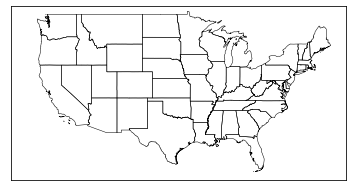

In [41]:
m = Basemap(
    projection="merc", llcrnrlon=-130, llcrnrlat=23, urcrnrlon=-64, urcrnrlat=50
)
us_info = m.readshapefile("st99_d00", "states", drawbounds=True)

In [42]:
state_names = pd.read_csv("states.csv")
state_names.abbreviation = state_names.abbreviation.str.lower()
state_names_dict = {
    state.abbreviation: state["name"] for index, state in state_names.iterrows()
}
ufos.state.replace(state_names_dict, inplace=True)
ufos

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,Texas,29.8830556,-97.941111
3,10/10/1956 21:00,us,Texas,28.9783333,-96.645833
4,10/10/1960 20:00,us,Hawaii,21.4180556,-157.803611
5,10/10/1961 19:00,us,Tennessee,36.5950000,-82.188889
7,10/10/1965 23:45,us,Connecticut,41.1175000,-73.408333
...,...,...,...,...,...
80327,9/9/2013 21:15,us,Tennessee,36.1658333,-86.784444
80328,9/9/2013 22:00,us,Idaho,43.6136111,-116.202500
80329,9/9/2013 22:00,us,California,38.2972222,-122.284444
80330,9/9/2013 22:20,us,Virginia,38.9011111,-77.265556


In [43]:
num_sightings_by_state = ufos.groupby("state").size()
num_sightings_by_state

state
Alabama                  642
Alaska                   319
Arizona                 2414
Arkansas                 588
California              8912
Colorado                1413
Connecticut              892
Delaware                 166
District of Columbia       7
Florida                 3835
Georgia                 1255
Hawaii                   262
Idaho                    521
Illinois                2499
Indiana                 1288
Iowa                     678
Kansas                   613
Kentucky                 855
Louisiana                558
Maine                    558
Maryland                 837
Massachusetts           1256
Michigan                1836
Minnesota               1012
Mississippi              375
Missouri                1458
Montana                  478
Nebraska                 381
Nevada                   803
New Hampshire            486
New Jersey              1255
New Mexico               720
New York                2980
North Carolina          1740
North Da

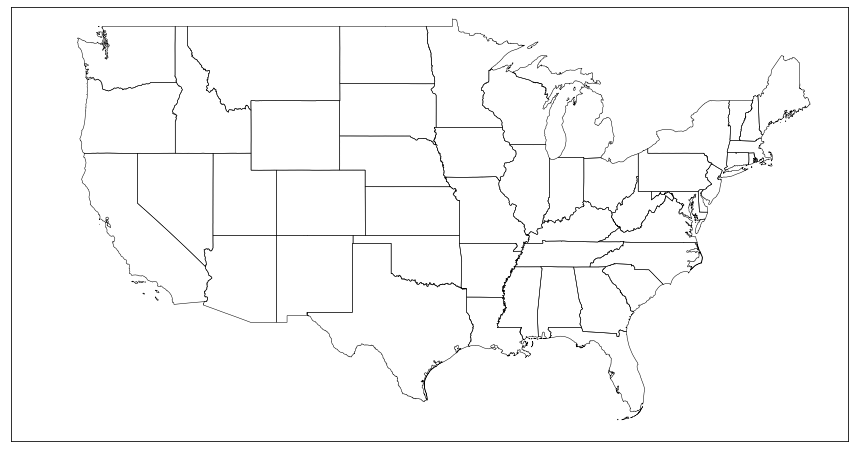

In [44]:
fig = plt.figure(figsize=(15, 10))
m = Basemap(
    projection="merc", llcrnrlon=-130, llcrnrlat=23, urcrnrlon=-64, urcrnrlat=50
)
us_info = m.readshapefile("st99_d00", "states", drawbounds=True)
colors = {}
state_names = []
cmap = plt.cm.Greens
vmin = num_sightings_by_state.min()
vmax = num_sightings_by_state.max()

In [45]:
for shape_dict in m.states_info:
    state_name = shape_dict["NAME"]
    # Skip DC and Puerto Rico
    if state_name not in ["District of Columbia", "Puerto Rico"]:
        sightings = num_sightings_by_state[num_sightings_by_state.index == state_name][0]
        colors[state_name] = cmap(np.sqrt((sightings - vmin) / (vmax - vmin)))[:3]
    state_names.append(state_name)

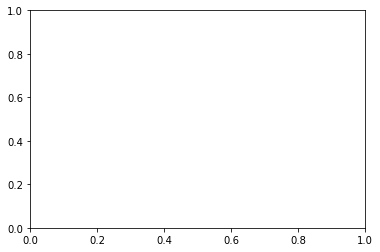

In [46]:
ax = plt.gca()
for nshape, seg in enumerate(m.states):
    # Skip DC and Puerto Rico
    if state_names[nshape] not in ["District of Columbia", "Puerto Rico"]:
        color = rgb2hex(colors[state_names[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)

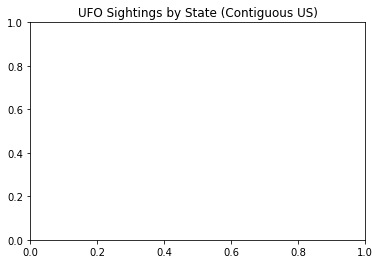

In [47]:
plt.title("UFO Sightings by State (Contiguous US)")
colorbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
matplotlib.colorbar.ColorbarBase(
    colorbar_ax, cmap=cmap, norm=matplotlib.colors.Normalize(vmin, vmax)
)
plt.show()

## Graphs

### intro

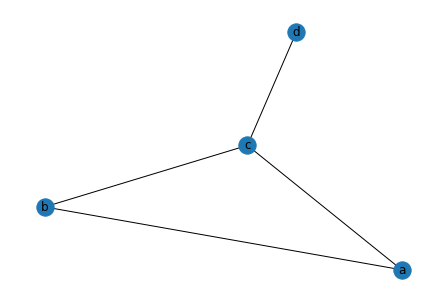

In [12]:
g = nx.Graph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

nx.draw(g, with_labels=True)
plt.show()

### add weights

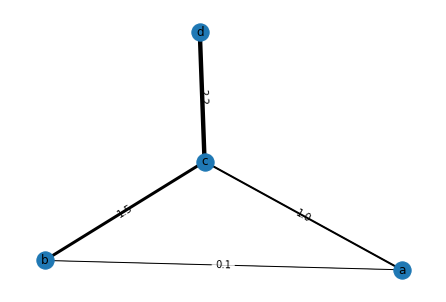

In [13]:
pos = nx.spring_layout(g)
weights = nx.get_edge_attributes(g, "weight")
nx.draw(g, pos, with_labels = True)
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw_networkx_edges(g, pos, width = [v * 2 for v in weights.values()])
plt.show()


### shorted path

In [14]:
print(nx.shortest_path(g, "b", "d"), nx.shortest_path_length(g, "b", "d"))
print(nx.shortest_path(g, "b", "d", weight = "weight"), nx.shortest_path_length(g, "b", "d", weight = "weight"))

['b', 'c', 'd'] 2
['b', 'a', 'c', 'd'] 3.3000000000000003


In [15]:
g = nx.DiGraph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

In [18]:
print(nx.shortest_path(g, "b", "d")) # ['b', 'c', 'd']

['b', 'c', 'd']


In [19]:
# print(nx.shortest_path(g, "d", "b")) # Error: No path between d and b.

### florentine_families

In [4]:
f = nx.florentine_families_graph()

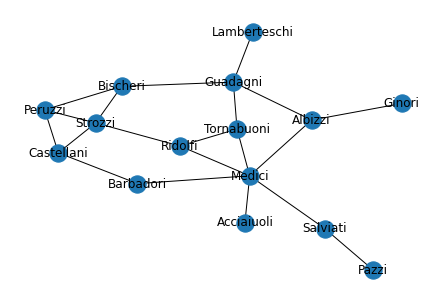

In [5]:
nx.draw(f, with_labels=True)

In [6]:
nx.shortest_path(f, source="Pazzi", target="Peruzzi")

['Pazzi', 'Salviati', 'Medici', 'Barbadori', 'Castellani', 'Peruzzi']

In [7]:
nx.shortest_path_length(f, source="Pazzi", target="Peruzzi")

5

In [20]:
sorted(nx.betweenness_centrality(f), key=lambda pair: pair[1])
nx.betweenness_centrality(f)

{'Acciaiuoli': 0.0,
 'Medici': 0.521978021978022,
 'Castellani': 0.05494505494505495,
 'Peruzzi': 0.02197802197802198,
 'Strozzi': 0.10256410256410257,
 'Barbadori': 0.09340659340659341,
 'Ridolfi': 0.11355311355311355,
 'Tornabuoni': 0.09157509157509157,
 'Albizzi': 0.21245421245421245,
 'Salviati': 0.14285714285714288,
 'Pazzi': 0.0,
 'Bischeri': 0.1043956043956044,
 'Guadagni': 0.2545787545787546,
 'Ginori': 0.0,
 'Lamberteschi': 0.0}